<a href="https://colab.research.google.com/github/DogbakDaily/DAP_2022/blob/main/lecutre9_ipynb_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

The data set is presented in a dictionary form:

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Set up DataFrame

In [7]:
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
cancer_df['diagnosis'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = cancer_df.drop(columns=['diagnosis'])
y = cancer_df['diagnosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

# Train the Support Vector Classifier
**[TODO]** Train the SVM Classifier with `gamma='auto` using `X_train` and `y_train`.

In [12]:
from sklearn.svm import SVC

model = SVC(gamma='auto')

model.fit(X_train, y_train)

SVC(gamma='auto')

## Predictions and Evaluations

**[TODO]** Now let's predict using the trained model.

In [13]:
predictions = model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(confusion_matrix(y_test, predictions))

[[  0  63]
 [  0 108]]


In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      1.00      0.77       108

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Woah! Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data).

We can search for parameters using a GridSearch!

# Gridsearch

Finding the right parameters (like what `C` or `gamma values` to use) is a tricky task!

But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a `grid` of parameters and just trying out all the possible combinations is called a `Gridsearch`, this method is common enough that Scikit-learn has this functionality built in with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)! The CV stands for cross-validation.

The `GridSearchCV` takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [17]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [18]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [19]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [20]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [21]:
grid_predictions = grid.predict(X_test)

In [22]:
print(confusion_matrix(y_test, grid_predictions))

[[ 59   4]
 [  3 105]]


In [23]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Todo 1

* 위의 실습에서 사용한 유방암 진단 데이터셋에 여러 모델을 적용해보고 모델의 성능을 accuracy, precision, recall, f1 score를 이용하여 확인하는 문제입니다.

### 1.1 다양한 분류기를 이용하여 분석 모델을 구축하기. 아래 모델들 중 자유롭게 선정하여 구현해보세요.
* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#)
* [kNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneigh#)
* [Naïve Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#)
* [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)
* [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#)





In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# 모델 생성
model = LogisticRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 예측 결과 구하기
y_predict1 = model.predict(X_test)

# # kNN Classifier
# from sklearn.neighbors import KNeighborsClassifier

# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X_train, y_train)
# y_predict2 = neigh.predict(X_test)

# # Naive Bayes
# from sklearn.naive_bayes import GaussianNB

# naive = GaussianNB()
# naive.fit(X_train, y_train)
# y_predict3 = naive.predict(X_test)

# # Decsion Tree
# from sklearn import tree

# dec = tree.DecisionTreeClassifier()
# dec.fit(X_train, y_train)
# y_predict4 = dec.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### 1.2 생성한 모델의 성능 확인하기

* 분류에 대한 성능 지표(accuracy, precision, recall, f1 score)를 통해 생성한 모델의 성능을 확인한다.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
# model accuarcy
accuracy = accuracy_score(y_test, y_predict1)

# model precision
precision = precision_score(y_test, y_predict1)

# model recall
recall = recall_score(y_test, y_predict1)

# model f1 score
f1 = f1_score(y_test, y_predict1)

In [26]:
print("Accuracy: {0:.3f}".format(accuracy))
print("Precision: {0:.3f}".format(precision))
print("Recall: {0:.3f}".format(recall))
print("F1-Score: {0:.3f}".format(f1))

# Accuracy : 1(0.953) 2(0.918) 3(0.924) 4(0.918)
# Precision : 1(0.981) 2(0.935) 3(0.944) 4(0.970)
# Recall : 1(0.944) 2(0.935) 3(0.935) 4(0.898)
# F1_score : 1(0.962) 2(0.935) 3(0.940) 4(0.933)

Accuracy: 0.953
Precision: 0.981
Recall: 0.944
F1-Score: 0.962


# Todo 2

와인의 화학 성분 데이터를 활용하여 여러 classification 중 원하는 모델을 자유롭게 사용하여 와인의 종류를 구분하고 생성한 모델의 accuracy를 확인하는 문제입니다.

## 2.1 데이터 로드 및 전처리

* Data를 원하는 방법으로 전처리 하세요.

In [27]:
from sklearn.datasets import load_wine

wine = load_wine()

## 2.2 데이터 탐색하고 Train_set, Test_set 나누기

* test_size = 0.3, random_state = 0

In [28]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [29]:
# 데이터 셋의 설명 확인하기
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [30]:
print(wine['feature_names'])
print(wine['target_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [31]:
# X, Y 설정
X = wine['data']
Y = wine['target']

In [32]:
wine_df = pd.DataFrame(wine['data'], columns = wine['feature_names'])
wine_df['class'] = wine['target']

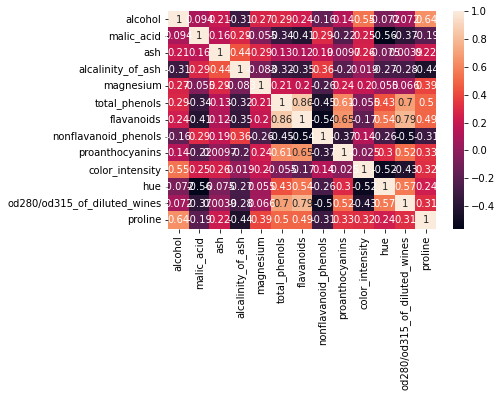

In [33]:
sns.heatmap(wine_df.drop(columns='class').corr() , annot=True)

In [34]:
wine_df.drop(columns='class').corr()
# total_phenols - flavanoids, flavanoids - od280/od315_of_diluted_wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [35]:
X = wine_df.drop(columns=['class'])

In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [37]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.501901,2.557432,0.258993,0.232558,-0.157895,-0.638298,-0.913174,1.074627,-0.707143,1.010067,-0.962963,-0.843813,0.137255
174,0.266160,1.381757,0.345324,0.813953,0.210526,-0.524823,-0.829341,0.537313,-0.207143,0.875839,-0.785185,-0.989858,0.157895
175,0.167300,1.631757,-0.287770,0.116279,1.157895,-0.723404,-0.865269,0.537313,-0.292857,1.848993,-1.111111,-0.989858,0.333333
176,0.091255,0.489865,0.028777,0.116279,1.157895,-0.666667,-0.871257,1.134328,-0.135714,1.546980,-1.081481,-0.941176,0.343653


In [38]:
from sklearn.model_selection import train_test_split

# 훈련용 데이터와 평가용 데이터 분할 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

##2.3 원하는 모델을 이용하여 분석 모델 구축하기

* 다양한 모델을 사용하여 학습하기

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# maxAccuracy = 0
# n = 0

# 모델생성

# for i in range(1, 50) :
#   model = KNeighborsClassifier(n_neighbors=i)
#   model.fit(X_train, Y_train)
#   Y_predict = model.predict(X_test)
#   accuracy = accuracy_score(Y_test, Y_predict)
#   if maxAccuracy < accuracy:
#     maxAccuracy = accuracy
#     n = i

model = LogisticRegression()

# 모델 훈련
model.fit(X_train, Y_train)

# 평가 데이터로 예측 수행하여 예측값 구하기
Y_predict = model.predict(X_test)

# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 

# from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# # May take awhile!
# grid.fit(X_train,Y_train)
# Y_predict = grid.predict(X_test)

In [40]:
# from sklearn.tree import export_text
# r = export_text(model, feature_names=wine['feature_names'])
# print(r)

In [41]:
# grid.best_params_

In [42]:
# grid.best_estimator_

##2.4 생성한 모델의 성능 확인하기

* accuracy 를 출력하세요. 


In [43]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [44]:
# model accuarcy
accuracy = accuracy_score(Y_test, Y_predict)
print("Accuracy: {0:.3f}".format(accuracy))

Accuracy: 1.000


##2.5 채점 기준

- Accuracy 점수가 95 이상: **50점 (만점)**
- Accuracy 점수가 93 이상, 95미만: **45점**
- Accuracy 점수가 90 이상, 93미만: **40점**
- Accuracy 점수가 90 미만: **35점**